# Dataset Investigation
Experimental Data for Question Classification

obtained from https://cogcomp.seas.upenn.edu/Data/QA/QC/

In [18]:
from collections import defaultdict
import requests
import os
import numpy as np
import matplotlib.pyplot as plt

## Download dataset and pre-processing

Run this cell to download the dataset:

Possibilies: `train_5500.label`, `train_4000.label`,`train_3000.label`,`train_2000.label`, `train_1000.label`,`

In [2]:
filename = 'train_5500.label'

os.makedirs('datasets', exist_ok=True)
url = f'https://cogcomp.seas.upenn.edu/Data/QA/QC/{filename}'
response = requests.get(url, allow_redirects=True)
with open(f'datasets/{filename}', 'xb') as file:
    file.write(response.content)

FileExistsError: [Errno 17] File exists: 'datasets/train_5500.label'

Save queries and class labels to Python lists:

In [3]:
query = []
label = []

with open(f'datasets/{filename}', 'r', errors='replace') as data:
    for line in data.readlines():
        tokens = line.split()
        label.append(tokens[0])
        query.append(tokens[1:])
        
print(query[0])
print(label[0])

['How', 'did', 'serfdom', 'develop', 'in', 'and', 'then', 'leave', 'Russia', '?']
DESC:manner


## Extract classes and subclasses

In [4]:
label_dict = defaultdict(lambda: [])

for token in label:
    mainc, subc = token.split(':')
    if not subc in label_dict[mainc]:
        label_dict[mainc].append(subc)

print(f'main class count: {len(label_dict.keys())}')
print(f'subclass count: {sum([len([j for j in i]) for i in label_dict.values()])}')
label_dict

main class count: 6
subclass count: 50


defaultdict(<function __main__.<lambda>()>,
            {'DESC': ['manner', 'def', 'reason', 'desc'],
             'ENTY': ['cremat',
              'animal',
              'event',
              'other',
              'letter',
              'religion',
              'food',
              'color',
              'termeq',
              'body',
              'dismed',
              'product',
              'substance',
              'sport',
              'plant',
              'techmeth',
              'instru',
              'word',
              'lang',
              'symbol',
              'veh',
              'currency'],
             'ABBR': ['exp', 'abb'],
             'HUM': ['ind', 'gr', 'title', 'desc'],
             'NUM': ['date',
              'count',
              'money',
              'period',
              'volsize',
              'other',
              'speed',
              'perc',
              'code',
              'dist',
              'temp',
              'ord',

## Class Distribution

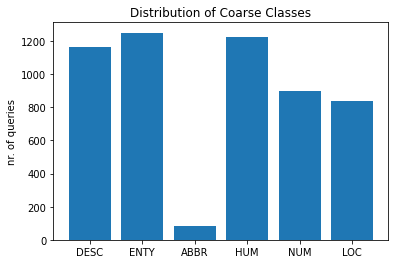

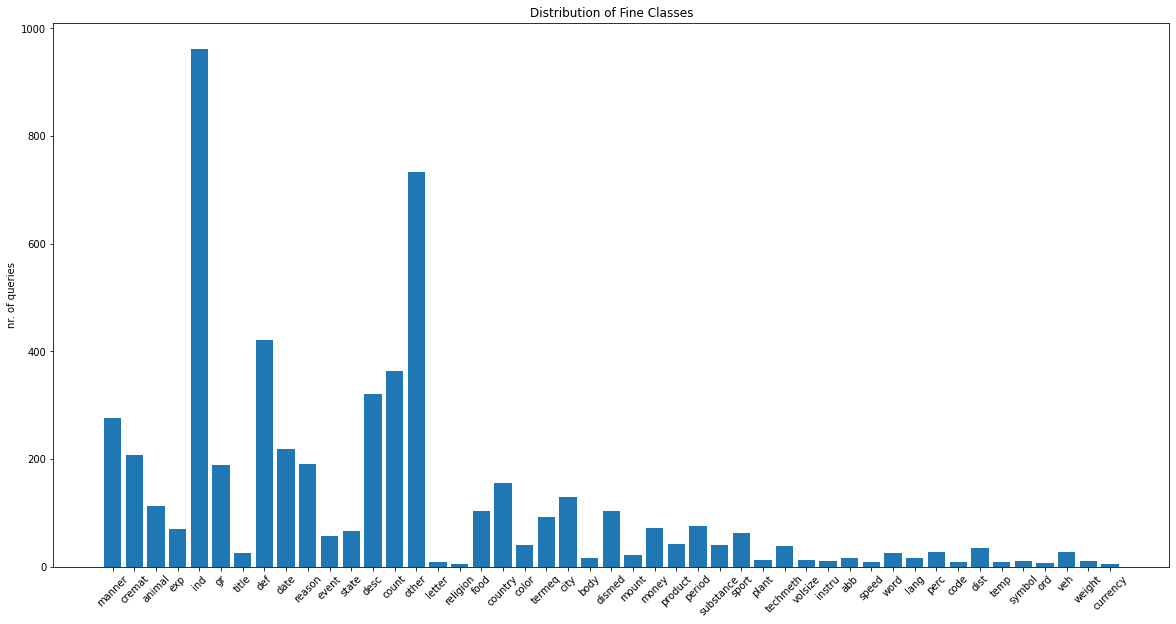

In [28]:
coarse_labels = [i.split(':')[0] for i in label]
fine_labels = [i.split(':')[1] for i in label]

coarse_dict = defaultdict(lambda: 0)
fine_dict = defaultdict(lambda: 0)

for l in coarse_labels:
    coarse_dict[l] += 1

for l in fine_labels:
    fine_dict[l] += 1


x = np.arange(len(coarse_dict.keys()))
plt.bar(x, coarse_dict.values())
plt.xticks(x, coarse_dict.keys())
plt.title('Distribution of Coarse Classes')
plt.ylabel('nr. of queries')
plt.show()

x = np.arange(len(fine_dict.keys()))
plt.figure(figsize=(20,10))
plt.bar(x, fine_dict.values())
plt.xticks(x, fine_dict.keys(), rotation=45)
plt.title('Distribution of Fine Classes')
plt.ylabel('nr. of queries')
plt.show()


## Query Length

In [8]:
query_lengths = [len(q) for q in query]
print(f'Longest query: {max(query_lengths)}')
print(query[max(zip(query_lengths, range(len(query_lengths))))[1]])
print('---')
print(f'Shortest query: {min(query_lengths)}')
print(query[min(zip(query_lengths, range(len(query_lengths))))[1]])



Longest query: 37
['Why', 'do', 'people', 'get', 'goosebumps', 'when', 'they', 'have', 'something', 'emotional', 'happen', 'to', 'them', ',', 'like', 'when', 'they', 'hear', 'a', 'beautiful', 'piece', 'of', 'music', ',', 'or', 'see', 'something', 'beautiful', ',', 'or', 'get', 'aroused', 'by', 'someone', 'they', 'love', '?']
---
Shortest query: 3
['Define', 'cosmology', '.']


## Unique Tokens

In [37]:
unique_tokens = set()

for q in query:
    unique_tokens.update(q)
            
print(f'Number of unique tokens: {len(unique_tokens)}')

Number of unique tokens: 9448


## Sequence Length Distribution

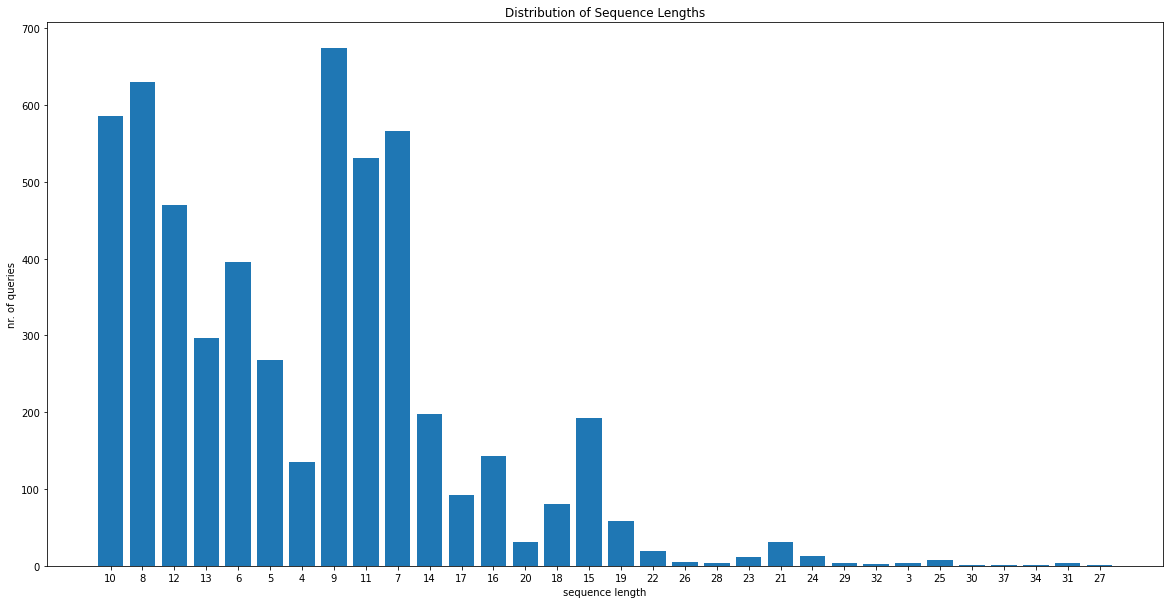

In [32]:
query_lengths = [len(q) for q in query]
seq_dict = defaultdict(lambda: 0)
for length in query_lengths:
    seq_dict[length] += 1
    
    
x = np.arange(len(seq_dict.keys()))
plt.figure(figsize=(20,10))
plt.bar(x, seq_dict.values())
plt.xticks(x, seq_dict.keys())
plt.title('Distribution of Sequence Lengths')
plt.ylabel('nr. of queries')
plt.xlabel('sequence length')
plt.show()